# Split 7:3

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [29]:
# Load data from CSV file
df = pd.read_csv('FPT.csv')
# Convert Close time column to date format
df["time"] = pd.to_datetime(df["time"], format="%Y-%m-%d")
# Sort data by Close time column
df = df.sort_values("time")
df = df[['close','time']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
df

,close,time
0,19318.330078,2019-03-01
1,19491.587891,2019-03-04
2,19448.273438,2019-03-05
3,19318.330078,2019-03-06
4,19383.300781,2019-03-07
...,...,...
1318,125216.640625,2024-06-10
1319,127391.304688,2024-06-11
1320,132000.000000,2024-06-12
1321,130000.000000,2024-06-13


In [30]:
# 2. Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [31]:
from pandas.core.indexers.utils import Any
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)
y_pred_train=model.predict(x_train)


In [32]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['close'])
y_pred = model.predict(x_test)

In [33]:
# 6. Tạo tập 30 ngày tiếp theo
df['time'] = pd.to_datetime(df['time'])
last_index = df['time'].index[-1]
last_date = df['time'].iloc[-1]
date_range = pd.date_range(last_date, periods=31, freq='D')

last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[92246.57883485 92306.0411036  92365.50337235 92424.9656411
 92484.42790985 92543.8901786  92603.35244735 92662.8147161
 92722.27698485 92781.7392536  92841.20152235 92900.6637911
 92960.12605985 93019.5883286  93079.05059735 93138.5128661
 93197.97513485 93257.4374036  93316.89967235 93376.3619411
 93435.82420985 93495.2864786  93554.74874735 93614.2110161
 93673.67328485 93733.1355536  93792.59782235 93852.0600911
 93911.52235985 93970.9846286 ]


In [34]:
from sklearn.metrics import mean_squared_log_error
def calculate_mape(actual, predicted):
    ape = np.abs((actual - predicted) / actual)
    mape = np.mean(ape) * 100
    return mape

#RMSE
test_rmse = mean_squared_error(y_test, y_pred,squared=False)
print('Testing RMSE:', test_rmse)

#MAE
test_mae = mean_absolute_error(y_pred, y_test)
print('Testing MAE:', test_mae)

#MSLE
testing_msle = mean_squared_log_error(y_test, y_pred)
print('Testing MSLE:', testing_msle)

# MAPE
test_mape = calculate_mape(y_test, y_pred)
print('Testing MAPE:', test_mape)


Testing RMSE: 12459.887340923739
Testing MAE: 10320.929739153295
Testing MSLE: 0.02484380491150863
Testing MAPE: 14.058543618477287


Testing RMSE: 12459.887340923739
Testing MAE: 10320.929739153295
Testing MSLE: 0.02484380491150863
Testing MAPE: 14.058543618477287


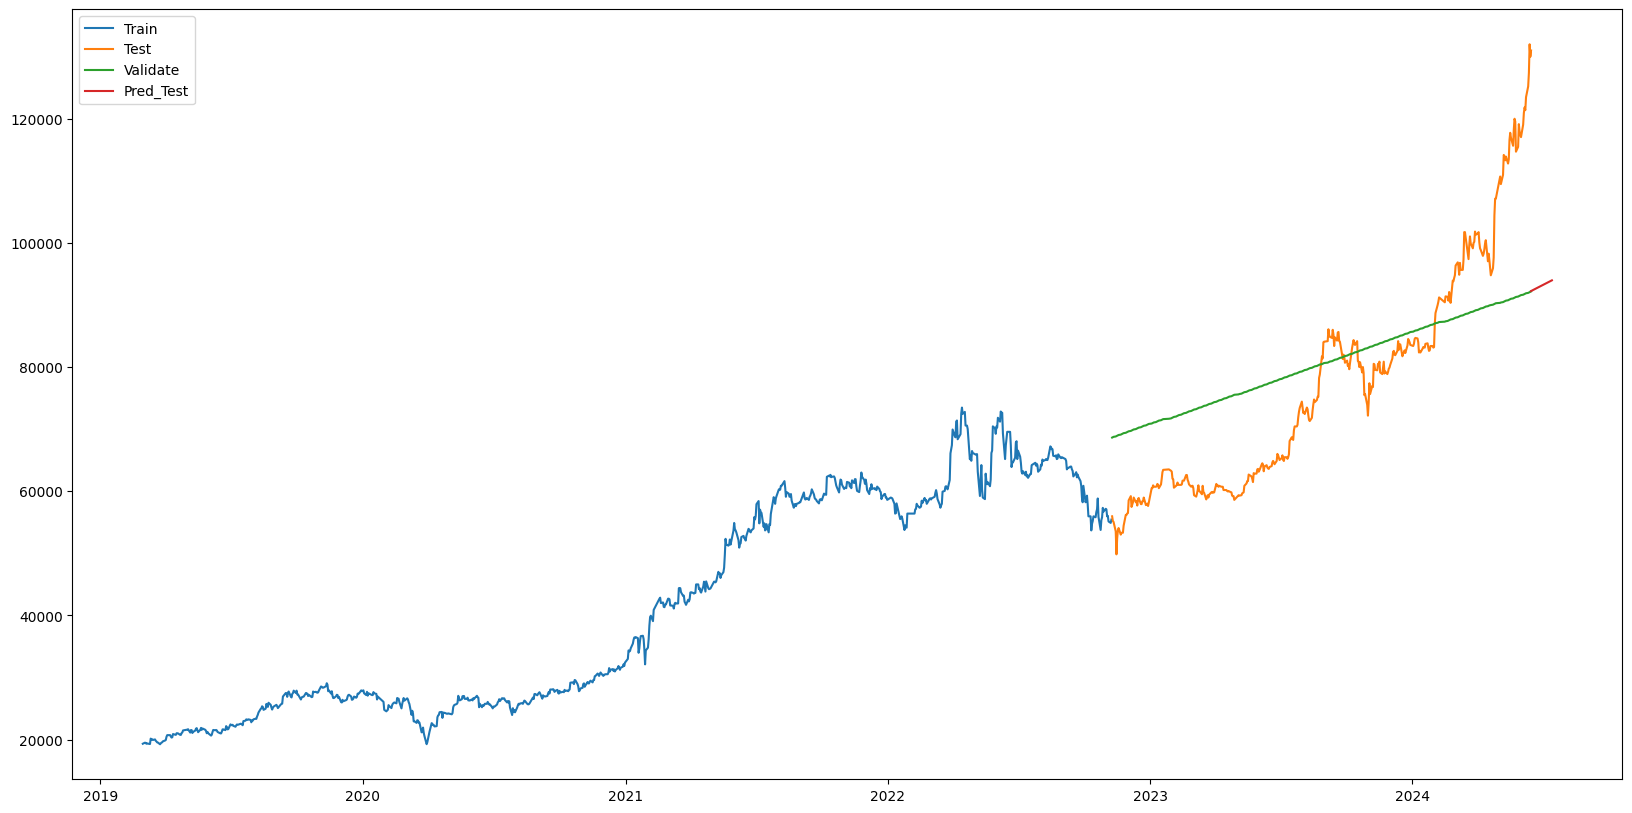

In [35]:
#RMSE
test_rmse = mean_squared_error(y_test, y_pred,squared=False)
print('Testing RMSE:', test_rmse)

#MAE
test_mae = mean_absolute_error(y_pred, y_test)
print('Testing MAE:', test_mae)

#MSLE
testing_msle = mean_squared_log_error(y_test, y_pred)
print('Testing MSLE:', testing_msle)

# MAPE
test_mape = calculate_mape(y_test, y_pred)
print('Testing MAPE:', test_mape)

date_range = date_range[:-1]  # Cắt bớt phần tử cuối cùng của date_range

plt.subplots(figsize=(20,10))
plt.plot(train_data['time'], train_data['close'])
plt.plot(test_data['time'], test_data['close'])
plt.plot(test_data['time'], y_pred)
plt.plot(date_range, y_next_30_days)
plt.legend(['Train', 'Test', 'Validate', 'Pred_Test', 'Next30Day'])
plt.show()

In [36]:
test_data.index

RangeIndex(start=926, stop=1323, step=1)

# Split 8:2

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [38]:
# Load data from CSV file
df = pd.read_csv('FPT.csv')
# Convert Close time column to date format
df["time"] = pd.to_datetime(df["time"], format="%Y-%m-%d")
# Sort data by Close time column
df = df.sort_values("time")
df = df[['close','time']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
df

,close,time
0,19318.330078,2019-03-01
1,19491.587891,2019-03-04
2,19448.273438,2019-03-05
3,19318.330078,2019-03-06
4,19383.300781,2019-03-07
...,...,...
1318,125216.640625,2024-06-10
1319,127391.304688,2024-06-11
1320,132000.000000,2024-06-12
1321,130000.000000,2024-06-13


In [39]:
# 2. Split the data into training, testing, and validation sets
train_size = int(0.8 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [40]:
from pandas.core.indexers.utils import Any
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)
y_pred_train=model.predict(x_train)


In [41]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['close'])
y_pred = model.predict(x_test)

In [42]:
# 6. Tạo tập 30 ngày tiếp theo
df['time'] = pd.to_datetime(df['time'])
last_index = df['time'].index[-1]
last_date = df['time'].iloc[-1]
date_range = pd.date_range(last_date, periods=31, freq='D')

last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[84166.14704742 84217.4879426  84268.82883779 84320.16973297
 84371.51062815 84422.85152333 84474.19241852 84525.5333137
 84576.87420888 84628.21510406 84679.55599925 84730.89689443
 84782.23778961 84833.5786848  84884.91957998 84936.26047516
 84987.60137034 85038.94226553 85090.28316071 85141.62405589
 85192.96495107 85244.30584626 85295.64674144 85346.98763662
 85398.3285318  85449.66942699 85501.01032217 85552.35121735
 85603.69211254 85655.03300772]


In [43]:
from sklearn.metrics import mean_squared_log_error
def calculate_mape(actual, predicted):
    ape = np.abs((actual - predicted) / actual)
    mape = np.mean(ape) * 100
    return mape

#RMSE
test_rmse = mean_squared_error(y_test, y_pred,squared=False)
print('Testing RMSE:', test_rmse)

#MAE
test_mae = mean_absolute_error(y_pred, y_test)
print('Testing MAE:', test_mae)

#MSLE
testing_msle = mean_squared_log_error(y_test, y_pred)
print('Testing MSLE:', testing_msle)

# MAPE
test_mape = calculate_mape(y_test, y_pred)
print('Testing MAPE:', test_mape)


Testing RMSE: 15196.286031208707
Testing MAE: 10925.840612648062
Testing MSLE: 0.0259573210426503
Testing MAPE: 11.37652852306093


Testing RMSE: 15196.286031208707
Testing MAE: 10925.840612648062
Testing MSLE: 0.0259573210426503
Testing MAPE: 11.37652852306093


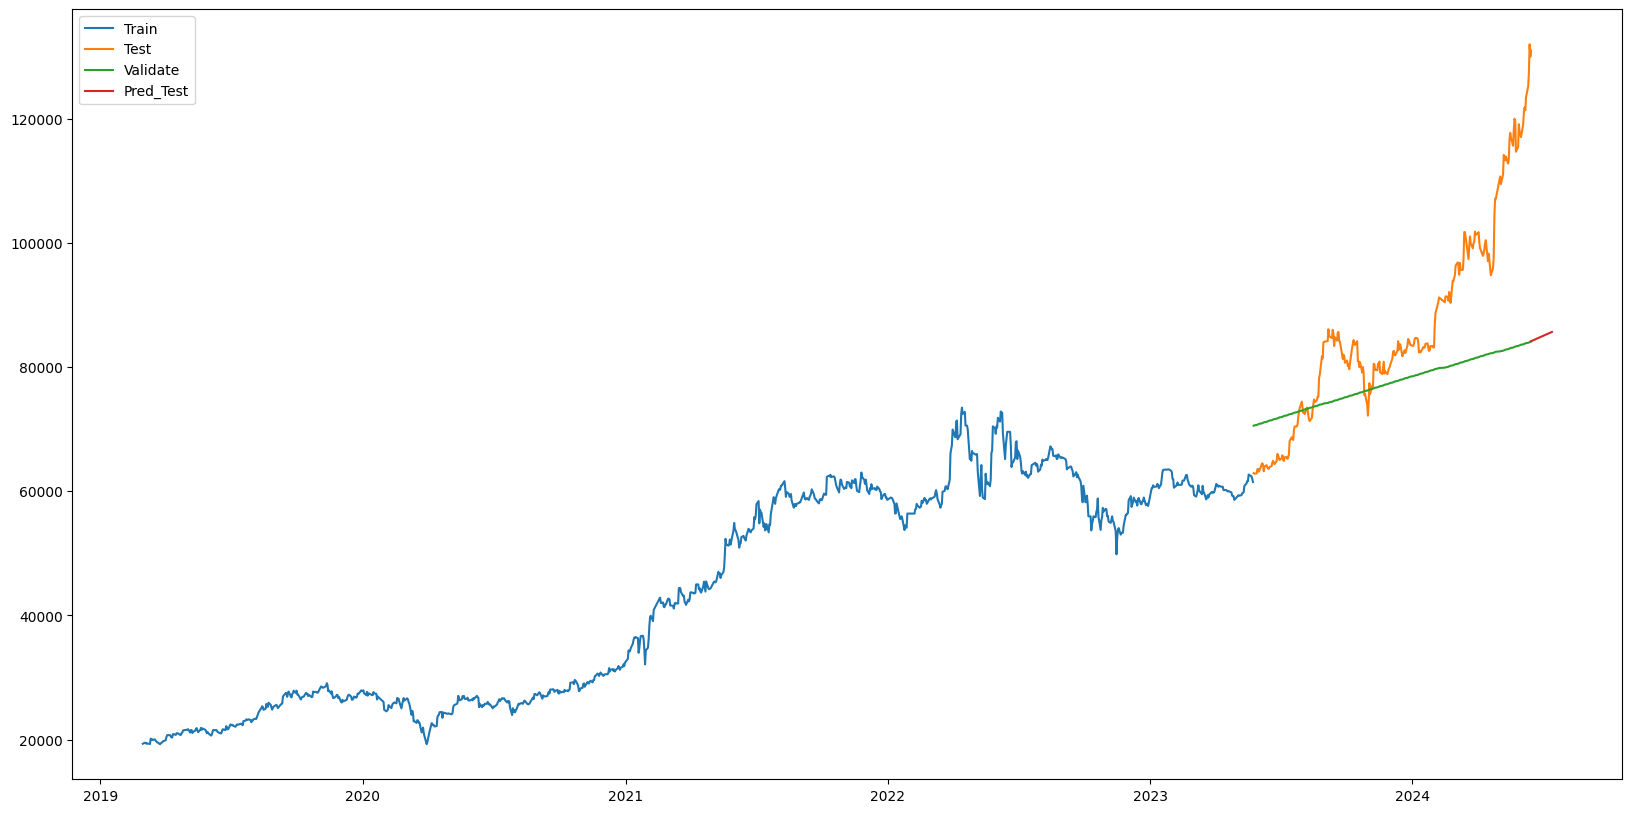

In [44]:
#RMSE
test_rmse = mean_squared_error(y_test, y_pred,squared=False)
print('Testing RMSE:', test_rmse)

#MAE
test_mae = mean_absolute_error(y_pred, y_test)
print('Testing MAE:', test_mae)

#MSLE
testing_msle = mean_squared_log_error(y_test, y_pred)
print('Testing MSLE:', testing_msle)

# MAPE
test_mape = calculate_mape(y_test, y_pred)
print('Testing MAPE:', test_mape)

date_range = date_range[:-1]  # Cắt bớt phần tử cuối cùng của date_range

plt.subplots(figsize=(20,10))
plt.plot(train_data['time'], train_data['close'])
plt.plot(test_data['time'], test_data['close'])
plt.plot(test_data['time'], y_pred)
plt.plot(date_range, y_next_30_days)
plt.legend(['Train', 'Test', 'Validate', 'Pred_Test', 'Next30Day'])
plt.show()

In [45]:
test_data.index

RangeIndex(start=1058, stop=1323, step=1)

# Split 9:1

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [47]:
# Load data from CSV file
df = pd.read_csv('FPT.csv')
# Convert Close time column to date format
df["time"] = pd.to_datetime(df["time"], format="%Y-%m-%d")
# Sort data by Close time column
df = df.sort_values("time")
df = df[['close','time']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
df

,close,time
0,19318.330078,2019-03-01
1,19491.587891,2019-03-04
2,19448.273438,2019-03-05
3,19318.330078,2019-03-06
4,19383.300781,2019-03-07
...,...,...
1318,125216.640625,2024-06-10
1319,127391.304688,2024-06-11
1320,132000.000000,2024-06-12
1321,130000.000000,2024-06-13


In [48]:
# 2. Split the data into training, testing, and validation sets
train_size = int(0.9 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [49]:
from pandas.core.indexers.utils import Any
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)
y_pred_train=model.predict(x_train)


In [50]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['close'])
y_pred = model.predict(x_test)

In [51]:
# 6. Tạo tập 30 ngày tiếp theo
df['time'] = pd.to_datetime(df['time'])
last_index = df['time'].index[-1]
last_date = df['time'].iloc[-1]
date_range = pd.date_range(last_date, periods=31, freq='D')

last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[84562.39611172 84614.18841876 84665.9807258  84717.77303283
 84769.56533987 84821.35764691 84873.14995395 84924.94226099
 84976.73456803 85028.52687507 85080.31918211 85132.11148915
 85183.90379619 85235.69610323 85287.48841027 85339.28071731
 85391.07302435 85442.86533139 85494.65763843 85546.44994547
 85598.24225251 85650.03455955 85701.82686659 85753.61917363
 85805.41148067 85857.2037877  85908.99609474 85960.78840178
 86012.58070882 86064.37301586]


In [52]:
from sklearn.metrics import mean_squared_log_error
def calculate_mape(actual, predicted):
    ape = np.abs((actual - predicted) / actual)
    mape = np.mean(ape) * 100
    return mape

#RMSE
test_rmse = mean_squared_error(y_test, y_pred,squared=False)
print('Testing RMSE:', test_rmse)

#MAE
test_mae = mean_absolute_error(y_pred, y_test)
print('Testing MAE:', test_mae)

#MSLE
testing_msle = mean_squared_log_error(y_test, y_pred)
print('Testing MSLE:', testing_msle)

# MAPE
test_mape = calculate_mape(y_test, y_pred)
print('Testing MAPE:', test_mape)


Testing RMSE: 20287.89859810472
Testing MAE: 16308.440281128385
Testing MSLE: 0.04353661756488715
Testing MAPE: 15.39515520910105


Testing RMSE: 20287.89859810472
Testing MAE: 16308.440281128385
Testing MSLE: 0.04353661756488715
Testing MAPE: 15.39515520910105


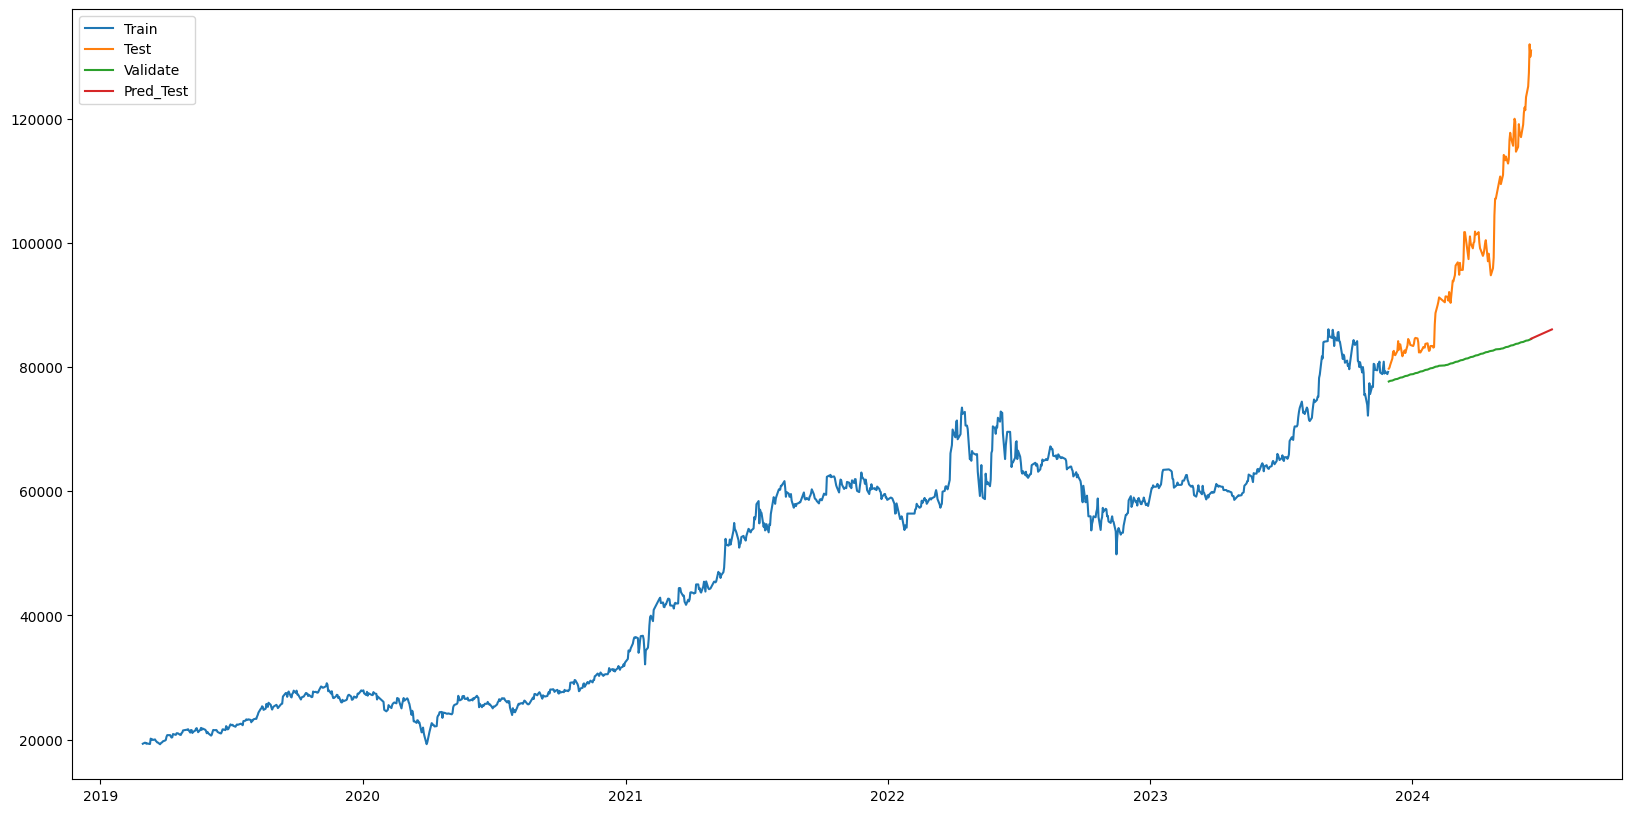

In [53]:
#RMSE
test_rmse = mean_squared_error(y_test, y_pred,squared=False)
print('Testing RMSE:', test_rmse)

#MAE
test_mae = mean_absolute_error(y_pred, y_test)
print('Testing MAE:', test_mae)

#MSLE
testing_msle = mean_squared_log_error(y_test, y_pred)
print('Testing MSLE:', testing_msle)

# MAPE
test_mape = calculate_mape(y_test, y_pred)
print('Testing MAPE:', test_mape)

date_range = date_range[:-1]  # Cắt bớt phần tử cuối cùng của date_range

plt.subplots(figsize=(20,10))
plt.plot(train_data['time'], train_data['close'])
plt.plot(test_data['time'], test_data['close'])
plt.plot(test_data['time'], y_pred)
plt.plot(date_range, y_next_30_days)
plt.legend(['Train', 'Test', 'Validate', 'Pred_Test', 'Next30Day'])
plt.show()

In [54]:
test_data.index

RangeIndex(start=1190, stop=1323, step=1)